![title](https://d3mlfyygrfdi2i.cloudfront.net/kickstarter-logo-color.png)

# 1. Business Understanding
Kickstarter is a funding platform for creative projects.
Every project creator sets their project's funding goal and deadline. If people like the project, they can pledge money to make it happen. If the project succeeds in reaching its funding goal, all backers' credit cards are charged when time expires. Funding on Kickstarter is all-or-nothing. If the project falls short of its funding goal, no one is charged.

##  1.1 Objective:
- Explore the characteristics of projects on Kickstarter 
- Build a model to predict whether projects will success or fail

In [1]:
%matplotlib inline

### Import libraries

In [2]:
import pandas as pd 
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import plotly.graph_objs  as go
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
#modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# 2. Data Understanding
## 2.1 Data Overview
Input Data contains 378,661 projects with 15 variables

In [3]:
#Import the csv file and check the basic information
df=pd.read_csv("ks-projects-201801.csv")
print "Rows:",df.shape[0]," Columns:",df.shape[1]
display(df.head())

Rows: 378661  Columns: 15


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
display (df.describe())

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


### Show the data type of each columns

In [5]:
# Data Type of each columns
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


### Remove Useless Column
- ID : no meaning variable  
- pledged,usd_pledged: Duplicate with usd_pledged_real (usd_pledged_real=pledged * the conversion rate)
- goal: Duplicate with usd_goal_real (usd_goal_real=goal * the conversion rate)

In [6]:
df=df.drop(['ID','goal','pledged','usd pledged'],1)

### Top 10 Fund Rasiers 

In [7]:
display(df.nlargest(10,'usd_pledged_real'))

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
157270,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,2015-02-24 15:44:42,successful,78471,US,20338986.27,500000.0
250254,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30,2014-07-08 10:14:37,successful,62642,US,13285226.36,50000.0
216629,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,2016-06-30,2016-05-24 15:49:52,successful,66673,US,12779843.49,1000000.0
289915,Kingdom Death: Monster 1.5,Tabletop Games,Games,USD,2017-01-08,2016-11-25 06:01:41,successful,19264,US,12393139.69,100000.0
282416,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,2012-05-19,2012-04-11 06:59:04,successful,68929,US,10266845.74,100000.0
293861,The World's Best TRAVEL JACKET with 15 Feature...,Product Design,Design,USD,2015-09-03,2015-07-07 13:52:34,successful,44949,US,9192055.66,20000.0
187652,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,2015-01-20 19:00:19,successful,219382,US,8782571.99,10000.0
6665,OUYA: A New Kind of Video Game Console,Gaming Hardware,Games,USD,2012-08-09,2012-07-10 14:44:41,successful,63416,US,8596474.58,950000.0
309630,"THE 7th CONTINENT – What Goes Up, Must Come Down.",Tabletop Games,Games,USD,2017-10-19,2017-09-26 20:00:02,successful,43733,US,7072757.00,40000.0
271276,"The Everyday Backpack, Tote, and Sling",Product Design,Design,USD,2016-09-10,2016-07-13 00:47:35,successful,26359,US,6565782.50,500000.0


## 2.2 Handle Missing Value
### Search the number of missing value in each column

In [8]:
#Search if any missing value 
print ("Missing values per column:")
print (df.isnull().sum())

Missing values per column:
name                4
category            0
main_category       0
currency            0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64


In [9]:
#print the row with null record
nans = lambda df: df[df.isnull().any(axis=1)]
NAN_record=nans(df)
display(NAN_record)

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
166851,NaN,Narrative Film,Film & Video,USD,2012-02-29,2012-01-01 12:35:31,failed,1,US,100.00,200000.00
307234,NaN,Video Games,Games,GBP,2013-01-06,2012-12-19 23:57:48,failed,12,GB,316.05,3224.97
309991,NaN,Product Design,Design,USD,2016-07-18,2016-06-18 05:01:47,suspended,0,US,0.00,2500.00
338931,NaN,Painting,Art,USD,2011-12-05,2011-11-06 23:55:55,failed,5,US,220.00,35000.00


In [10]:
#delete rows with missing value
df=df.dropna()

## 2.3 Data Formatting
### change the format of "deadline" and "launched" to datatime

In [11]:
# change the format of "deadline" and "launched" to datatime
df['deadline']=pd.to_datetime(df['deadline'],format='%Y-%m-%d')
df['launched']=pd.to_datetime(df['launched'],format='%Y-%m-%d %H:%M:%S')

In [12]:
#get the maximum and minimum value of 'deadline' and 'launched' 
print "Launched (Min):",min(df['launched'])," Launched (Max):",max(df['launched'])
print "Deadline (Min):",min(df['deadline'])," Deadline (Max):",max(df['deadline'])


Launched (Min): 1970-01-01 01:00:00  Launched (Max): 2018-01-02 15:02:31
Deadline (Min): 2009-05-03 00:00:00  Deadline (Max): 2018-03-03 00:00:00


In [13]:
# Launched Time as 1970-1-1 does not make sense, search how many data contains problem launched time 
launched_min=min(df['launched'])
print "Problem Record No.", len(df[df['launched']==launched_min])


Problem Record No. 7


In [14]:
#Remove data with problem launched time
df=df[df['launched']!=launched_min]

### Create New variables:
- project duration -- days difference between launced date and dealine date
- launched_year -- year of the launched date
- launched_month -- month of the launched date

In [15]:
#create new columns:
# project duration
df['duration']=(df['deadline']-df['launched']).dt.days
# launched_year
df['launched_year']=df['launched'].dt.year
# launched_month
df['launched_month']=df['launched'].dt.month
display (df.head(4))

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,duration,launched_year,launched_month
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,58,2015,8
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,59,2017,9
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,44,2013,1
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,29,2012,3


### Remove Useless Column:
Remove "deadline" and "launched"

In [16]:
df=df.drop(['deadline','launched'],1)

### Get the basic information of each columns

In [17]:
def get_unique(x,categ_no=20):
    """
    Print the unique value if the number of unqiue value less than 20 or input value 
    Input: 
        x: DataFrame
        catego_no: int - number of unqiue value to be shown
    """
    header=['Column','dType','UniqueNo','UniqueValues']
    record=[]
    for column in x:
        if x[column].nunique()<=categ_no:
            UniqueValue=",".join(map(str,x[column].unique().tolist()))
            print column,": ",UniqueValue
            record.append([column,x[column].dtype,x[column].nunique(),UniqueValue])
        else:
            record.append([column,x[column].dtype,x[column].nunique(),None])
    df2 = pd.DataFrame(np.array(record),columns=header)
    display (df2)
    return df2
category_summary=get_unique(df,23)

main_category :  Publishing,Film & Video,Music,Food,Design,Crafts,Games,Comics,Fashion,Theater,Art,Photography,Technology,Dance,Journalism
currency :  GBP,USD,CAD,AUD,NOK,EUR,MXN,SEK,NZD,CHF,DKK,HKD,SGD,JPY
state :  failed,canceled,successful,live,undefined,suspended
country :  GB,US,CA,AU,NO,IT,DE,IE,MX,ES,N,0",SE,FR,NL,NZ,CH,AT,DK,BE,HK,LU,SG,JP
launched_year :  2015,2017,2013,2012,2016,2014,2010,2011,2009,2018
launched_month :  8,9,1,3,7,2,12,4,10,5,11,6


,Column,dType,UniqueNo,UniqueValues
0,name,object,375757,None
1,category,object,159,None
2,main_category,object,15,"Publishing,Film & Video,Music,Food,Design,Craf..."
3,currency,object,14,"GBP,USD,CAD,AUD,NOK,EUR,MXN,SEK,NZD,CHF,DKK,HK..."
4,state,object,6,"failed,canceled,successful,live,undefined,susp..."
5,backers,int64,3963,None
6,country,object,23,"GB,US,CA,AU,NO,IT,DE,IE,MX,ES,N,0"",SE,FR,NL,NZ..."
7,usd_pledged_real,float64,106065,None
8,usd_goal_real,float64,50338,None
9,duration,int64,92,None


## 2.4 Data Visualization

In [18]:
def get_category_freq(df,column,chart,direction="h",normalized=True,pos=0,headNo=None):
    """
    Get the frequency of each category type and plot the graph showing the distribution 
    Input:
        df: Dataframe
        column: the feature to check 
    Return:
        freq: percentage of occurrence 
    """   

    #calculate the percentage 
    if normalized:
        freq=df[column].value_counts(normalize=True) * 100
    elif headNo==None:
        freq=df[column].value_counts()
    else:
        freq=df[column].value_counts().head(headNo)

    #prepare the variable for plotting a graph
    labels=list(freq.index)
    values=list(freq.values)
    
    if chart=="pie":
        #pie char 
        patches, texts = plt.pie(values,shadow=True, startangle=90)
        # Plot
        output_labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, values)]
        plt.title("Distribution of "+column)
        #sort_legend = True
        #if sort_legend:
        #patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
         #                                     key=lambda x: x[2],
          #                                    reverse=True))
        plt.legend(patches, output_labels, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=8)
        plt.tight_layout()
        
    elif chart=="bar":
        if direction=="h":
            ax = sns.barplot(y=labels, x=values, orient="h", palette="cool", alpha=0.8)
        else:
            ax = sns.barplot(x=labels, y=values, palette="cool", alpha=0.8)
        ax.legend(loc=pos)
        plt.title("Distribution of "+column)
        plt.tight_layout() 
    
    if pos==0:
        plt.show()
    

### 2.4.1 State
Definition of each state:
- failed : If the project can't reach the funding goal when time expires 
- successful : If the project succeeds in reaching its funding goal
- canceled : If the creater canceled the project before the deadline
- undefined : Unknown
- live : In progress project 
- suspended :If the project is in violation of Kickstarter's rule

State "failed" and "successful" comprising ~88% of the dataset. For the rest of the analysis, we will focus on this two state, other states data will be dropped out.

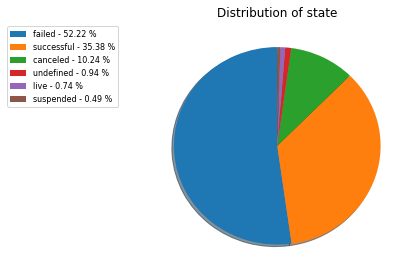

In [19]:
get_category_freq(df,'state','pie')

Drop all the rows which state are not "failed" or "successful"

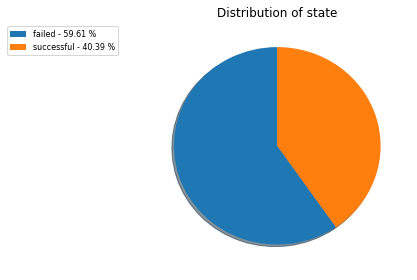

In [20]:
df=df[(df["state"]=="failed") | (df["state"]=="successful")]
get_category_freq(df,'state',"pie")

create subset for successful and failed projects

In [21]:
#create subset of dataframe of different status
df_failed=df[df.state=="failed"]
df_success=df[df.state=="successful"]

## 2.4.2 Currency, country, launced_year, launced_month

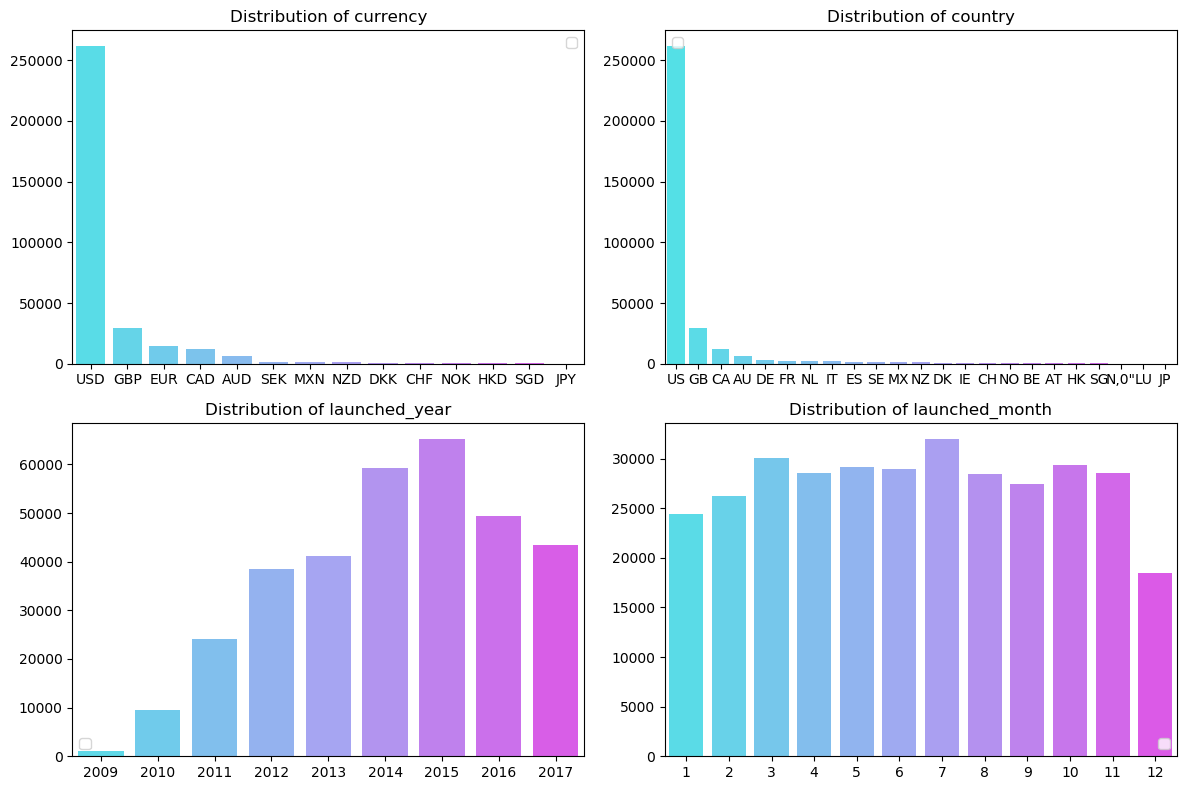

In [22]:
nx = 2
ny = 2

config=["currency","country","launched_year","launched_month"]
# Iterate over the axes
count=0
fig = plt.figure( figsize=(12, 8),dpi=100)
for y in xrange(nx):
    for x in xrange(ny):
        plt.subplot(nx, ny, y * ny + x + 1)  # Add one for 1-indexing
        get_category_freq(df,config[count],'bar','v',False,count+1)
        count+=1
# Finally show the window
plt.show()

### Successful rate by launched_month

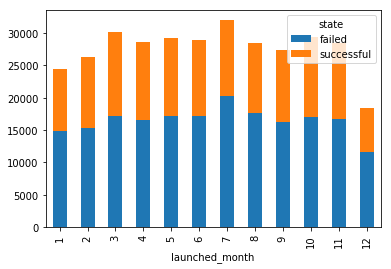

In [23]:
df_plot = df.groupby(['state', 'launched_month']).size().reset_index().pivot(columns='state', index='launched_month', values=0)
df_plot['total']=df_plot['failed']+df_plot['successful']
df_plot[['failed','successful']].plot(kind='bar', stacked=True)
plt.show()

## 2.4.3 Project category: Top 25 category and Main_category

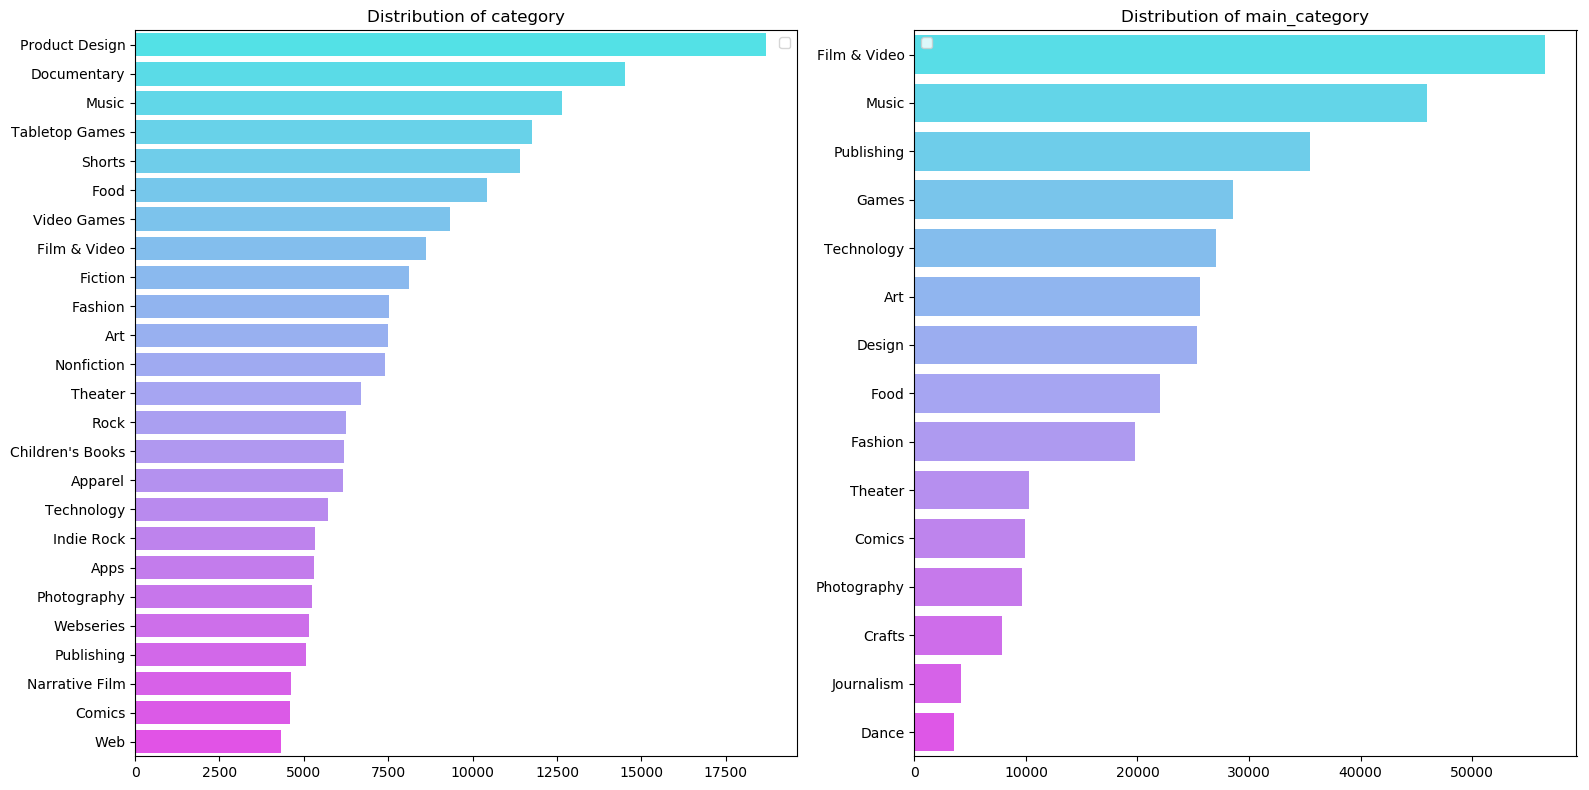

In [24]:
nx = 1
ny = 2

config=[["category",25],["main_category",None]]
# Iterate over the axes
count=0
fig = plt.figure( figsize=(16, 8),dpi=100)
for y in xrange(nx):
    for x in xrange(ny):
        plt.subplot(nx, ny, y * ny + x + 1)  # Add one for 1-indexing
        get_category_freq(df,config[count][0],'bar','h',False,count+1,config[count][1])
        count+=1
# Finally show the window
plt.show()

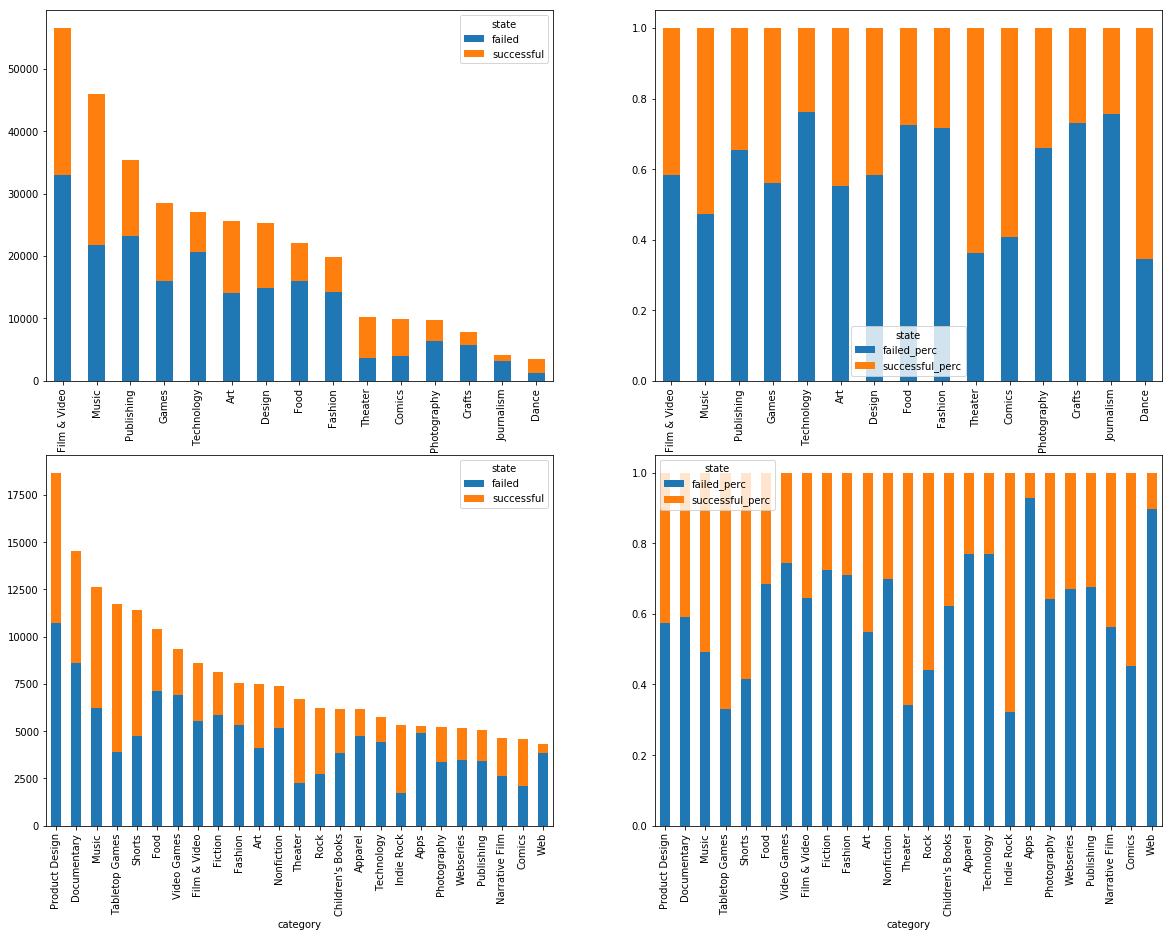

In [25]:
def PlotFreqBarChart(groupBy1,groupBy2,nx,ny,df,Type1,Type2,num):
    """
    Plot both Count and Percentage of different Types group by given variables
    Input:
        groupBy1: string, the variable to show in different colors
        groupBy2: string, the x-axis
        nx,ny: int, the position of subplots
        df: DataFrame
        Type1,Type2: string, Values of groupBy1
        num: int, number of values to show 
    """
    df_plot = df.groupby([groupBy1, groupBy2]).size().reset_index().pivot(columns=groupBy1, index=groupBy2, values=0)
    df_plot['total']=df_plot[Type1]+df_plot[Type2]
    df_plot=df_plot.nlargest(num,'total')
    df_plot[[Type1,Type2]].plot(kind='bar', stacked=True,ax=ax[nx][ny])
    df_plot[Type1+'_perc']= df_plot[Type1]/df_plot['total']
    df_plot[Type2+'_perc']= df_plot[Type2]/df_plot['total']
    df_plot[[Type1+'_perc',Type2+'_perc']].plot(kind='bar', stacked=True,ax=ax[nx][ny+1])
    
fig,ax=plt.subplots(2,2,figsize=(20, 15))    
PlotFreqBarChart('state', 'main_category',0,0,df,'failed','successful',15)
PlotFreqBarChart('state', 'category',1,0,df,'failed','successful',25)
plt.show()

### 2.4.4 Quantitative Data: Duration,Goal Amount, Pledge Amount

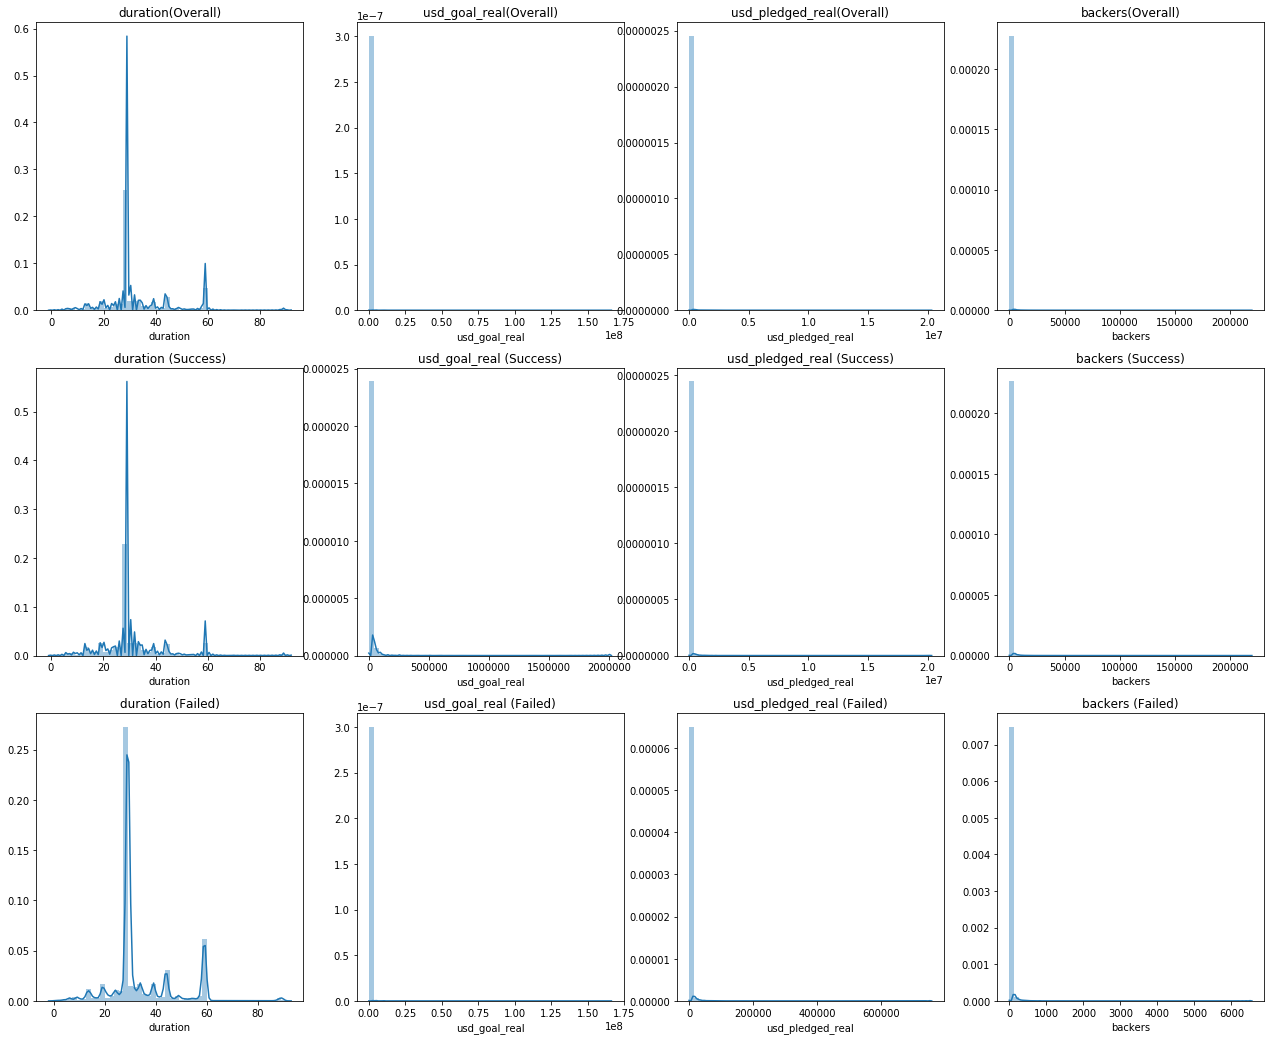

In [27]:
nx=3
ny=4
columns=['duration','usd_goal_real','usd_pledged_real','backers']
fig,ax=plt.subplots(nx,ny,figsize=(22, 18))
for i in xrange(nx):
    for j in xrange(ny):
        if i==0:    
            sns.distplot(df[columns[j]],ax=ax[i][j])
            ax[i][j].set_title(columns[j]+ "(Overall)")
        elif i==1:
            sns.distplot(df_success[columns[j]],ax=ax[i][j])
            ax[i][j].set_title(columns[j]+" (Success)")
        elif i==2:
            sns.distplot(df_failed[columns[j]],ax=ax[i][j])
            ax[i][j].set_title(columns[j]+" (Failed)")
plt.show()

### Duration

In [28]:
#compare the mean duration of campaigns of different status
print 'Mean duration:'
print 'Successful Projects: ',round(df_success['duration'].mean(),1)
print 'Failed Projects: ',round(df_failed['duration'].mean(),1)

Mean duration:
Successful Projects:  31.2
Failed Projects:  34.2


### Average pledged amount per projects

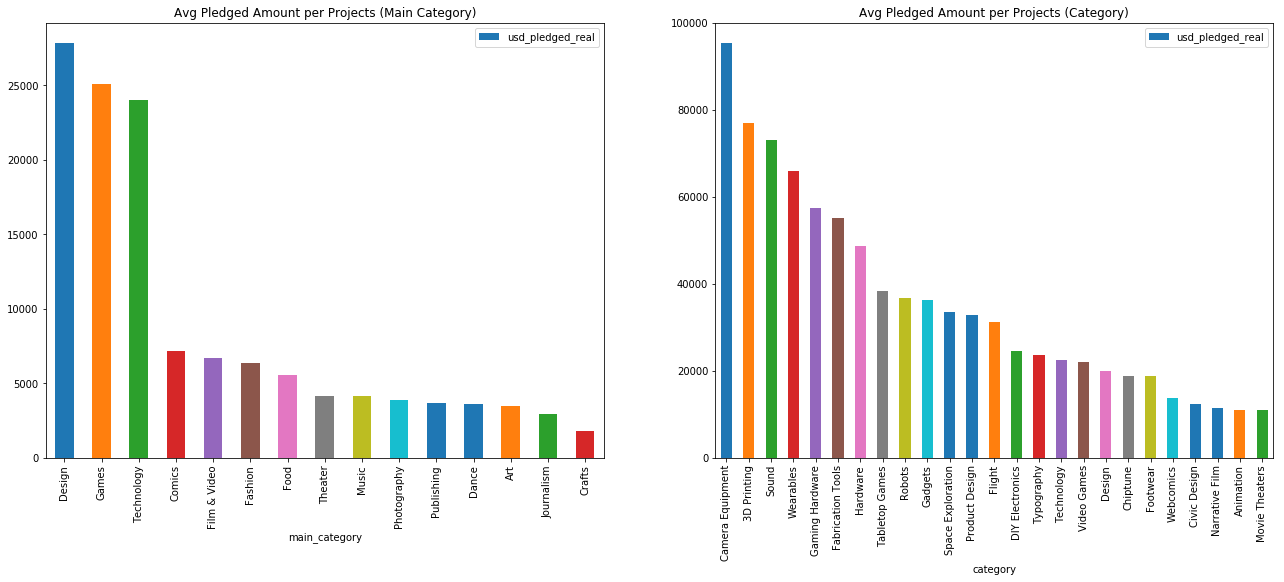

In [29]:
fig,ax=plt.subplots(1,2,figsize=(22, 8))
df_plot = df.groupby('main_category', as_index=False)['usd_pledged_real'].mean()
df_plot.head()
df_plot=df_plot.nlargest(15,'usd_pledged_real')
df_plot.plot(x='main_category',y='usd_pledged_real',kind='bar',ax=ax[0]).set_title("Avg Pledged Amount per Projects (Main Category)")
df_plot = df.groupby('category', as_index=False)['usd_pledged_real'].mean()
df_plot.head()
df_plot=df_plot.nlargest(25,'usd_pledged_real')
df_plot.plot(x='category',y='usd_pledged_real',kind='bar',ax=ax[1]).set_title("Avg Pledged Amount per Projects (Category)")
plt.show()

### Apply Log transformation to make "usd_goal_real","usd_pledged_real","backers" distribution less skewed

In [30]:
df['pledged_log'] = np.log(df['usd_pledged_real'] + 1)
df['goal_log'] = np.log(df['usd_goal_real'] + 1)
df['backers_log'] = np.log(df['backers'] + 1)

In [31]:
#remove useless column
df=df.drop(['usd_pledged_real','usd_goal_real','backers'],1)

In [32]:
display (df.describe())

,duration,launched_year,launched_month,pledged_log,goal_log,backers_log
count,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000,331672.000000
mean,32.954889,2014.180024,6.416149,5.970652,8.582613,2.775092
std,12.713279,1.930916,3.306967,3.252317,1.667097,1.890573
min,0.000000,2009.000000,1.000000,0.000000,0.009950,0.000000
25%,29.000000,2013.000000,4.000000,3.931826,7.601402,1.098612
50%,29.000000,2014.000000,6.000000,6.670766,8.517393,2.772589
75%,35.000000,2016.000000,9.000000,8.435766,9.615872,4.158883
max,91.000000,2017.000000,12.000000,16.828050,18.929673,12.298574


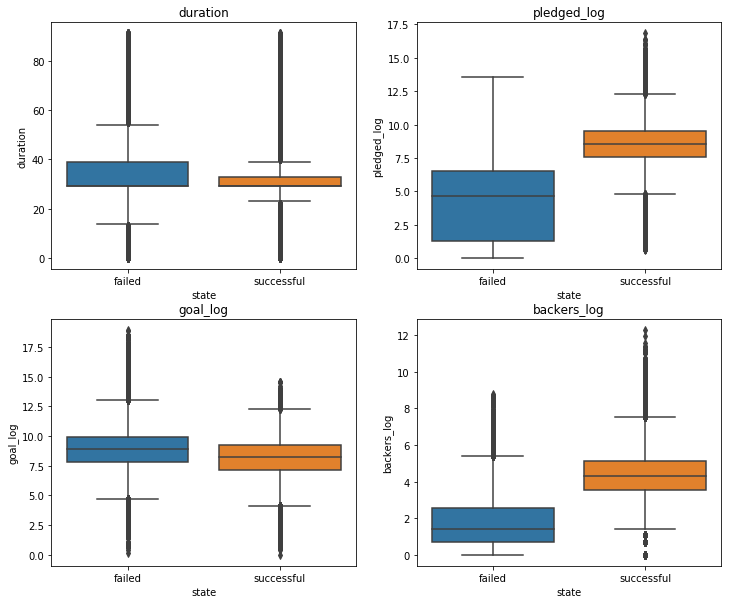

In [33]:
fig,ax=plt.subplots(2,2,figsize=(12, 10))
columns=["duration","pledged_log","goal_log","backers_log"]
idx=0
for i in xrange(2):
    for j in xrange(2):
        sns.boxplot(x="state", y=columns[idx], data=df,ax=ax[i][j]).set_title(columns[idx])
        idx+=1
plt.show()

### 2.4.5 Word Cloud of Project Name

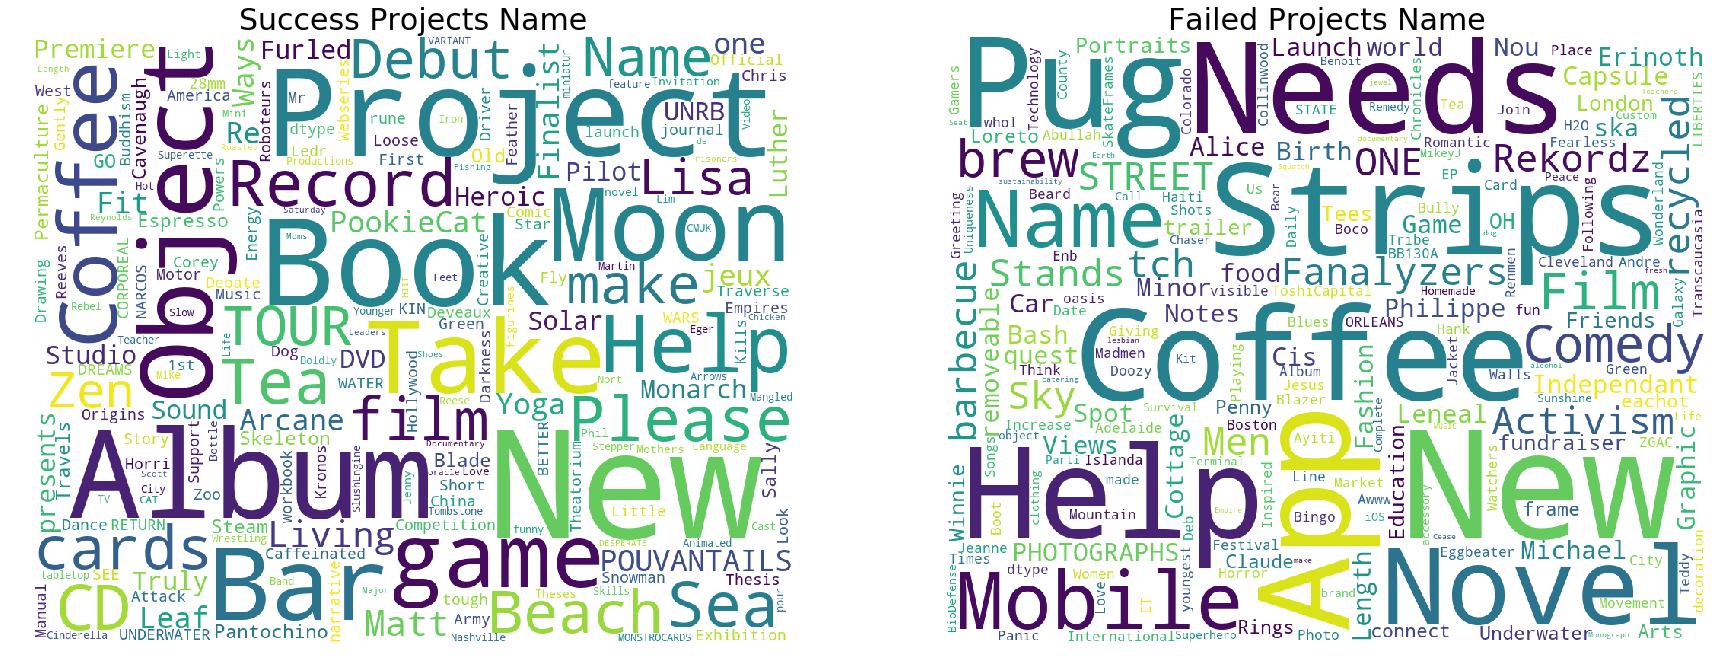

In [34]:
def show_wordcloud(data, title = None):
    '''Split names by space and generate word counts.'''
    wordcloud = WordCloud(
        background_color='white',
        max_words=1500,
        max_font_size=200, 
        width=1000, height=800,
        random_state=1,
    ).generate(str(data))
    ax.imshow(wordcloud)
    ax.axis('off')
    plt.title(title,fontsize=30)
    
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(1,2,1)
wordcloud = show_wordcloud(df_success['name'],"Success Projects Name")
ax = fig.add_subplot(1,2,2)
wordcloud = show_wordcloud(df_failed['name'],"Failed Projects Name")
plt.show()

# 3. Data Preparation

## 3.1 Divide quantitative variable into groups

In [35]:
def convert_lab(x,column,ValueRange,Label):
    """Convert numberical variable into categorical variables
    Input:
        x: DataFrame
        column: String  (column name of parameters)
        ValueRange: List of Integer (the Upper bound of each category) 
    """
    for i in range(len(Label)):
        if len(ValueRange)==len(Label) or i<=len(ValueRange)-1:
            if x[column]<=ValueRange[i]:
                return Label[i]
        else:
             return Label[i]
            

In [36]:
df["duration_group"]=df.apply(lambda df:convert_lab(df,"duration",[14,28,42],["duration_0-2w","duration_2-4w","duration_4-6w","duration_lt6w"]),axis=1)      
df["goal_group"]=df.apply(lambda df:convert_lab(df,"goal_log",[5,8,10],["goal_c1","goal_c2","goal_c3","goal_c4"]),axis=1)            

In [37]:
df['success']=df['state'].replace({"successful":"Yes","failed":"No"})

## 3.2 Remove Useless Columns

In [38]:
df=df.drop(['name','pledged_log','backers_log','launched_year','duration','goal_log','country','state','currency'],1)

In [39]:
category_summary=get_unique(df,23)

main_category :  Publishing,Film & Video,Music,Food,Crafts,Games,Design,Comics,Fashion,Theater,Art,Photography,Technology,Dance,Journalism
launched_month :  8,9,1,3,2,12,4,10,5,11,7,6
duration_group :  duration_lt6w,duration_4-6w,duration_2-4w,duration_0-2w
goal_group :  goal_c2,goal_c4,goal_c3,goal_c1
success :  No,Yes


,Column,dType,UniqueNo,UniqueValues
0,category,object,159,None
1,main_category,object,15,"Publishing,Film & Video,Music,Food,Crafts,Game..."
2,launched_month,int64,12,"8,9,1,3,2,12,4,10,5,11,7,6"
3,duration_group,object,4,"duration_lt6w,duration_4-6w,duration_2-4w,dura..."
4,goal_group,object,4,"goal_c2,goal_c4,goal_c3,goal_c1"
5,success,object,2,"No,Yes"


## 3.3 Encoding Columns

In [40]:
#Set the target column and parameter columns: binary column/ multiclass column 
target_col=["success"]
all_cols=list(df)
bin_cols=df.nunique()[df.nunique()==2].keys().tolist()
multi_cols=[col for col in all_cols if col not in (bin_cols+target_col)]

In [41]:
le=LabelEncoder()
#Label encoding Binary columns
for i in bin_cols:
    df[i]=le.fit_transform(df[i])
#Duplicate columns for multi value columns
df=pd.get_dummies(data=df,columns=multi_cols)

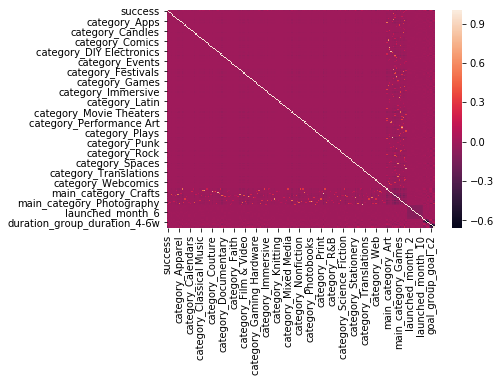

In [42]:
#check Overall Correlation 
sns.heatmap(df.corr())
plt.show()

## 3.4 Split data into training and testing set

In [43]:
#split into features and result
X=df.drop(['success'],axis=1)
y=df['success']
#split into training & testnig set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state =20000)

# 4. Modeling & Evaluation

In [44]:
def FindOptimalCutOff(target,X,classifier):
    """
    Find the optimal probaiblity cutoff point for a classification parameters
    Input:
        target: List of actual result 
        predicted: List of predicted result from model
        X: feature DataFrame
    """
    df=pd.DataFrame() #dataFrame to record the result 
    classifier.fit(X,target) #fit the model
    df['y_predict_prob']=classifier.predict_proba(X)[:,1] #get the predicted prob of training data
    fpr,tpr,threshold=roc_curve(target,df['y_predict_prob'])
    i=np.arange(len(tpr))
    roc=pd.DataFrame({'tf':pd.Series(tpr-(1-fpr),index=i),'threshold':pd.Series(threshold,index=i)})
    roc_t=roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])[0]

In [45]:
def getConfusionMatrix(target,predicted):
    """
    Confusion Matrix and Statistics: Accuracy, sensitivity , specificty, AUC
    Input:
        target: List of actual result 
        predicted: List of predicted result from model
    """
    cm=confusion_matrix(target,predicted)
    print ("Confusion Matrix : \n",cm)
    accuracy=accuracy_score(target,predicted)
    print ('Accuracy: {:.2f}'.format(accuracy))
    sensitivity=cm[0,0]/float(cm[0,0]+cm[0,1])
    print ('Sensitivity: {:.2f}'.format(sensitivity))
    specificity=cm[1,1]/float(cm[1,0]+cm[1,1])
    print ('Specificity: {:.2f}'.format(specificity))
    fpr,tpr,thresholds=roc_curve(target,predicted)
    Auc_value=auc(fpr,tpr)
    print ('Area Under Curve: {:.2f}'.format(Auc_value))

## 4.1 PCA+RandomForest

n_components:  102


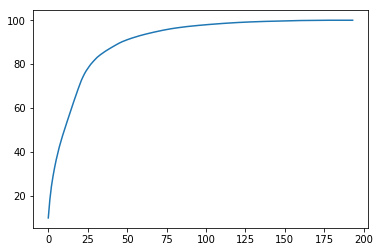

In [53]:
#Principal Components [PCA]
pca=PCA()
pca.fit(X_train) #find the principal components
ex_var_ratio=pca.explained_variance_ratio_ # the amount of variance that each PC explains
ex_var_ratio_cum=np.cumsum(np.round(ex_var_ratio,decimals=4)*100)#Cumulative Variance explains
#get the no. of PC which get at least 98% cumulative variance
for i in range(len(ex_var_ratio_cum)):
    if round(ex_var_ratio_cum[i],2)>=98:
        num_components=i+1
        break
print "n_components: ",num_components
plt.plot(ex_var_ratio_cum)
plt.show()

In [54]:
pca=PCA(n_components=num_components) #Select n variables which variance >98%
pca.fit(X_train) #find the principal components
X_train_pca=pca.fit_transform(X_train) 
print (sum(pca.explained_variance_ratio_)) #Total variance


0.9801183071634908


In [55]:
#training data
#Due to long execution time in jupyter, n_estimators use 50 instead of 500
rfr=RandomForestClassifier(n_estimators=50,random_state=1)
rfr.fit(X_train_pca,y_train) #fit the model with training data
threshold_pca=FindOptimalCutOff(y_train,X_train_pca,rfr) #get the threshold
print ("Threshold: ",threshold_pca)

('Threshold: ', 0.4154440982459738)


In [56]:
#testing data
X_test_pca=pca.fit_transform(X_test) 
rf_pca=pd.DataFrame() #dataFrame to record the result 
rf_pca['y_predict_prob_pca']=rfr.predict_proba(X_test_pca)[:,1] #get the predicted prob of testing data
rf_pca['y_predict_pca']=rf_pca['y_predict_prob_pca'].map(lambda x:1 if x>threshold_pca else 0) #get the classification
getConfusionMatrix(y_test,rf_pca['y_predict_pca']) #get the confusion matrix result 


('Confusion Matrix : \n', array([[30935, 28365],
       [12558, 27644]], dtype=int64))
Accuracy: 0.59
Sensitivity: 0.52
Specificity: 0.69
Area Under Curve: 0.60
